In [17]:
# %pip install pytesseract
# %pip install opencv-python

# Import dependencies

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import pytesseract

# Set tesseract path to where the tesseract exe file is located (Edit this path accordingly based on your own settings)

In [19]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Users\NAKUL\OneDrive\Desktop\projects\number plate detection\tesseract-ocr-w64-setup-5.3.1.20230401.exe"


# Read car image and convert color to RGB

In [20]:
carplate_img = cv2.imread('C:/Users/NAKUL/OneDrive/Desktop/projects/number plate detection/car_image.png')
carplate_img_rgb = cv2.cvtColor(carplate_img, cv2.COLOR_BGR2RGB) 

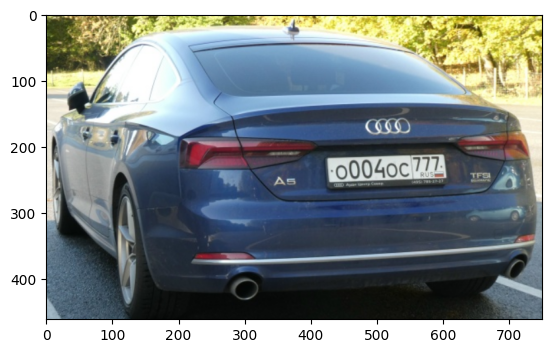

In [21]:
plt.imshow(carplate_img_rgb);

# Function to enlarge the plt display for user to view more clearly

In [22]:
def enlarge_plt_display(image, scale_factor):
 width = int(image.shape[1] * scale_factor / 100)
 height = int(image.shape[0] * scale_factor / 100)
 dim = (width, height)
 plt.figure(figsize = dim)
 plt.axis('off')
 plt.imshow(image)

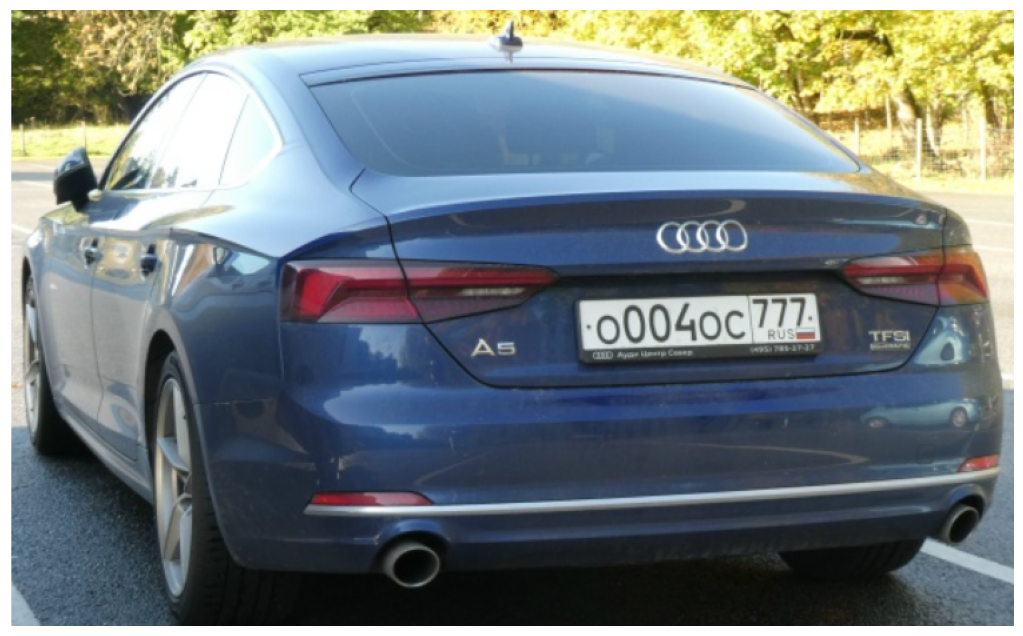

In [23]:
enlarge_plt_display(carplate_img_rgb, 1.9)

# Import Haar Cascade XML file for Russian car plate numbers

In [24]:
carplate_haar_cascade = cv2.CascadeClassifier('C:/Users/NAKUL/OneDrive/Desktop/projects/number plate detection/haarcascade_russian_plate_number.xml')

# Setup function to detect car plate

In [25]:
def carplate_detect(image):
  carplate_overlay = image.copy() # Create overlay to display red rectangle of detected car plate
  carplate_rects = carplate_haar_cascade.detectMultiScale(carplate_overlay,scaleFactor=1.1, minNeighbors=5)
  
  for x,y,w,h in carplate_rects:
    cv2.rectangle(carplate_overlay, (x,y), (x+w,y+h), (255,0,0), 5)

  return carplate_overlay

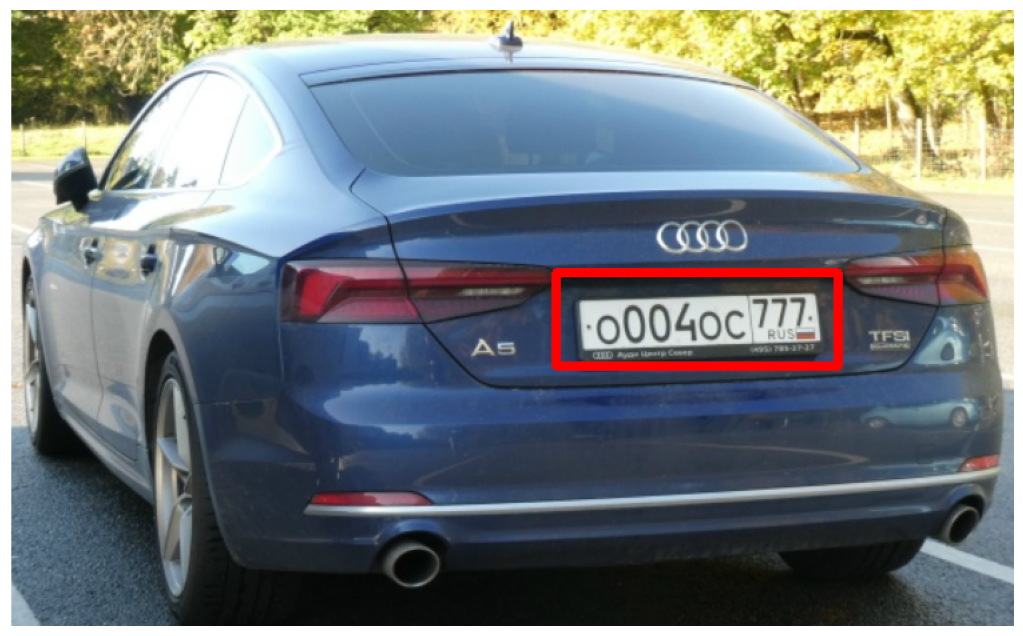

In [26]:
detected_carplate_img = carplate_detect(carplate_img_rgb)
enlarge_plt_display(detected_carplate_img, 1.9)

# Car Plate Number Recognition and Extraction with TesseractOCR

# ***Extract car license plate***

# Function to retrieve only the car plate sub-image itself

In [27]:
def carplate_extract(image):

    carplate_rects = carplate_haar_cascade.detectMultiScale(image,scaleFactor=1.1,minNeighbors=5)
    
    for x,y,w,h in carplate_rects:
        carplate_img = image[y+15:y+h-10 ,x+15:x+w-20]

    return carplate_img

## Enlarge image for further image processing later on

In [28]:
def enlarge_img(image, scale_percent):
 width = int(image.shape[1] * scale_percent / 100)
 height = int(image.shape[0] * scale_percent / 100)
 dim = (width, height)
 resized_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
 return resized_image

# Display extracted car license plate image

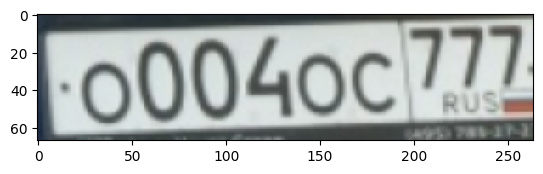

In [29]:
carplate_extract_img = carplate_extract(carplate_img_rgb)
carplate_extract_img = enlarge_img(carplate_extract_img, 150)
plt.imshow(carplate_extract_img);

# **Begin series of image processing to improve accuracy of TesseractOCR's results**

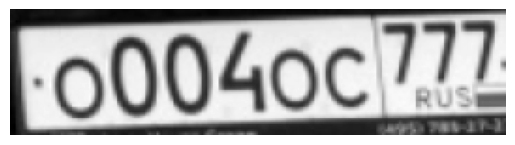

In [30]:
# Convert image to grayscale
carplate_extract_img_gray = cv2.cvtColor(carplate_extract_img, cv2.COLOR_RGB2GRAY)
plt.axis('off')
plt.imshow(carplate_extract_img_gray, cmap = 'gray');

### Apply median blur + grayscale

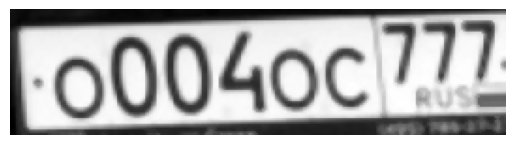

In [31]:
carplate_extract_img_gray_blur = cv2.medianBlur(carplate_extract_img_gray,3) # Kernel size 3
plt.axis('off')
plt.imshow(carplate_extract_img_gray_blur, cmap = 'gray');

### Display the text extracted from the car plate

In [32]:
print(pytesseract.image_to_string(carplate_extract_img_gray_blur, config = f'--psm 8 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\NAKUL\\AppData\\Local\\Temp\\tess_bregiz0f.txt'